In [1]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
dataset = pd.read_csv("/kaggle/input/car-data/Car Price.csv")

In [34]:
dataset.head(2)

,Brand,Model,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,18,775,2007,70000,4,1,1,0,60000
1,18,1041,2007,50000,4,1,1,0,135000


In [17]:
dataset.isnull().sum()

Brand            0
Model            0
Year             0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   KM_Driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
 8   Selling_Price  4340 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


# Brand

In [21]:
Brand_le = LabelEncoder()
dataset['Brand'] = Brand_le.fit_transform(dataset["Brand"])


# Fuel

In [23]:
dataset['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [24]:
Fuel_le = LabelEncoder()
dataset['Fuel'] = Fuel_le.fit_transform(dataset["Fuel"])

# Model

In [26]:
Model_le = LabelEncoder()
dataset['Model'] = Model_le.fit_transform(dataset["Model"])

# Seller_Type

In [28]:
Seller_Type_le = LabelEncoder()
dataset['Seller_Type'] = Seller_Type_le.fit_transform(dataset["Seller_Type"])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Transmission

In [30]:
Transmission_le = LabelEncoder()
dataset['Transmission'] = Transmission_le.fit_transform(dataset["Transmission"])

# Owner

In [33]:
Owner_le = LabelEncoder()
dataset['Owner'] = Owner_le.fit_transform(dataset["Owner"])

In [35]:
dataset.head(4)

,Brand,Model,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,18,775,2007,70000,4,1,1,0,60000
1,18,1041,2007,50000,4,1,1,0,135000
2,10,505,2012,100000,1,1,1,0,600000
3,5,118,2017,46000,4,1,1,0,250000


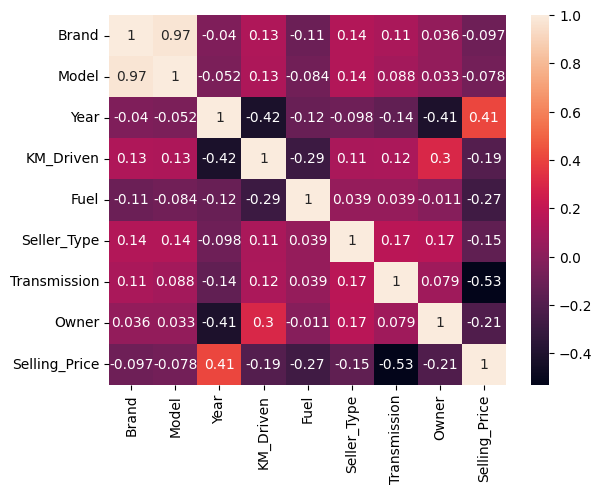

In [46]:
sns.heatmap(data = dataset.corr(), annot = True)
plt.show()

In [37]:
input_data = dataset.iloc[:, : -1]
output_data = dataset["Selling_Price"]

In [38]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()

# Fit and transform
scaled_array = ss.fit_transform(input_data)

# Reconstruct DataFrame with original column names
input_data = pd.DataFrame(scaled_array, columns=input_data.columns)

In [42]:
input_data

,Brand,Model,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,0.358173,0.058522,-1.445074,0.081139,1.014993,0.448192,0.339276,-0.665079
1,0.358173,0.723520,-1.445074,-0.347689,1.014993,0.448192,0.339276,-0.665079
2,-0.816674,-0.616477,-0.258795,0.724381,-0.974051,0.448192,0.339276,-0.665079
3,-1.550953,-1.583975,0.927485,-0.433455,1.014993,0.448192,0.339276,-0.665079
4,-0.963530,-1.181476,0.215717,1.603479,-0.974051,0.448192,0.339276,0.956519
...,...,...,...,...,...,...,...,...
4335,-0.816674,-0.373977,0.215717,0.295553,-0.974051,0.448192,0.339276,0.956519
4336,-0.816674,-0.376477,0.215717,0.295553,-0.974051,0.448192,0.339276,0.956519
4337,0.358173,0.063522,-0.970563,0.359877,1.014993,0.448192,0.339276,0.956519
4338,-0.816674,-0.926476,0.690229,0.509967,-0.974051,0.448192,0.339276,-0.665079


In [43]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    input_data, output_data, test_size=0.20, random_state=42
)

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [52]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train) * 100, lr.score(x_test, y_test) * 100


(46.925634366777444, 39.854106712208505)

In [56]:
lr1 = Lasso(alpha=0.5)
lr1.fit(x_train, y_train)
lr1.score(x_train, y_train) * 100, lr1.score(x_test, y_test) * 100

(46.92563436046584, 39.854183780961506)

In [61]:
lr2 = Ridge(alpha=0.05)
lr2.fit(x_train, y_train)

train_score = lr2.score(x_train, y_train) * 100
test_score = lr2.score(x_test, y_test) * 100
train_score, test_score

(46.92563411985316, 39.85459293061481)

In [64]:
lr3 = ElasticNet(alpha=0.5)
lr3.fit(x_train, y_train)
lr3.score(x_train, y_train) * 100, lr3.score(x_test, y_test) * 100

(45.02642672973797, 40.167992619735216)

In [88]:
dt = DecisionTreeRegressor(max_depth=13)
dt.fit(x_train, y_train)
dt.score(x_train, y_train) * 100, dt.score(x_test, y_test) * 100

(98.33743764851818, 54.34292842990687)

In [84]:
mean_squared_error(y_test, dt.predict(x_test)), mean_absolute_error(y_test, dt.predict(x_test))

(140535460859.1562, 129795.10256860724)

In [87]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
rf.score(x_train, y_train) * 100, rf.score(x_test, y_test) * 100

(97.17947193031459, 69.6547389191321)

In [89]:
mean_squared_error(y_test, rf.predict(x_test)), mean_absolute_error(y_test, rf.predict(x_test))

(92604720053.58951, 106569.4360015361)

In [69]:
sv = SVR()
sv.fit(x_train, y_train)
sv.score(x_train, y_train) * 100, sv.score(x_test, y_test) * 100

(-7.2396209352779906, -6.3417066838234115)

In [73]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn.score(x_train, y_train) * 100, knn.score(x_test, y_test) * 100

(79.48753904595729, 51.443466973181565)

In [90]:
mean_squared_error(y_test, knn.predict(x_test)), mean_absolute_error(y_test, knn.predict(x_test))

(148180110750.6829, 158833.39377880187)

In [96]:
rf.predict([[1.38616, 1.278519, -0.733307, 0.295553, -0.974051, 0.448192, 0.339276, -0.665079]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([142470.])

In [97]:
y_test

3978    165000
1448    250000
2664    120000
17      450000
1634    730000
         ...  
3468    130000
3164    350000
416     150000
1616    650000
2480    575000
Name: Selling_Price, Length: 868, dtype: int64

In [95]:
x_test

,Brand,Model,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
3978,1.386163,1.278519,-0.733307,0.295553,-0.974051,0.448192,0.339276,-0.665079
1448,1.092452,1.008520,1.401997,-0.840841,1.014993,0.448192,0.339276,-0.665079
2664,-0.816674,-0.693977,-1.207818,-0.525160,1.014993,0.448192,0.339276,0.956519
17,-0.963530,-1.181476,0.215717,1.603479,-0.974051,0.448192,0.339276,0.956519
1634,0.211317,-0.076478,0.690229,-0.133275,-0.974051,0.448192,-2.947457,0.956519
...,...,...,...,...,...,...,...,...
3468,0.358173,0.723520,-1.445074,-0.133275,1.014993,0.448192,0.339276,2.578116
3164,0.358173,0.226021,0.452973,1.153209,-0.974051,0.448192,0.339276,-0.665079
416,0.358173,0.441021,-0.496051,-0.562103,-0.974051,0.448192,0.339276,0.956519
1616,1.533019,1.556018,0.927485,-1.280819,1.014993,2.628855,0.339276,-0.665079


In [102]:
new_data = pd.DataFrame([[
    "Maruti", "Maruti 800 AC", 2007, 70000,
    "Petrol", "Individual", "Manual", "First Owner"
]], columns=x_train.columns)


In [114]:
new_data

,Brand,Model,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,0.358173,0.058522,-1.445074,0.081139,1.014993,0.448192,0.339276,-0.665079


In [115]:
rf.predict(new_data)

array([60180.])

In [104]:
new_data['Brand'] = Brand_le.transform(new_data["Brand"])

In [106]:
new_data['Fuel'] = Fuel_le.transform(new_data["Fuel"])

In [107]:
new_data['Seller_Type'] = Seller_Type_le.transform(new_data["Seller_Type"])

In [108]:
new_data['Transmission'] = Transmission_le.transform(new_data["Transmission"])

In [109]:
new_data['Model'] = Model_le.transform(new_data["Model"])

In [111]:
new_data['Owner'] = Owner_le.transform(new_data["Owner"])

In [113]:
new_data = pd.DataFrame(ss.transform(new_data), columns=new_data.columns) 